In [1]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pylab as plt

### Reading Image

In [2]:
dog_files = glob("./dataset/train2/dogs/*.jpg")
cat_files = glob("./dataset/train2/cats/*.jpg")

In [3]:
print(cat_files[20])
img_plt = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])

img_plt.shape, img_cv2.shape

./dataset/train2/cats\cat.3512.jpg


((294, 373, 3), (294, 373, 3))

In [4]:
img_plt, img_plt.flatten()

(array([[[12,  5,  0],
         [13,  6,  0],
         [13,  6,  0],
         ...,
         [ 5,  4,  2],
         [ 5,  4,  2],
         [ 5,  4,  2]],
 
        [[13,  6,  0],
         [13,  6,  0],
         [14,  7,  1],
         ...,
         [ 5,  4,  2],
         [ 5,  4,  2],
         [ 5,  4,  2]],
 
        [[14,  7,  1],
         [14,  7,  1],
         [14,  7,  1],
         ...,
         [ 5,  4,  2],
         [ 5,  4,  2],
         [ 5,  4,  2]],
 
        ...,
 
        [[35, 25, 16],
         [35, 25, 16],
         [34, 24, 15],
         ...,
         [29, 14, 11],
         [28, 13, 10],
         [28, 13, 10]],
 
        [[35, 25, 16],
         [35, 25, 16],
         [34, 24, 15],
         ...,
         [28, 13, 10],
         [27, 12,  9],
         [27, 12,  9]],
 
        [[34, 24, 15],
         [34, 24, 15],
         [33, 23, 14],
         ...,
         [28, 13, 10],
         [27, 12,  9],
         [27, 12,  9]]], dtype=uint8),
 array([12,  5,  0, ..., 27, 12,  9], dtyp

<Axes: title={'center': 'Distribution of pixel values'}, ylabel='Frequency'>

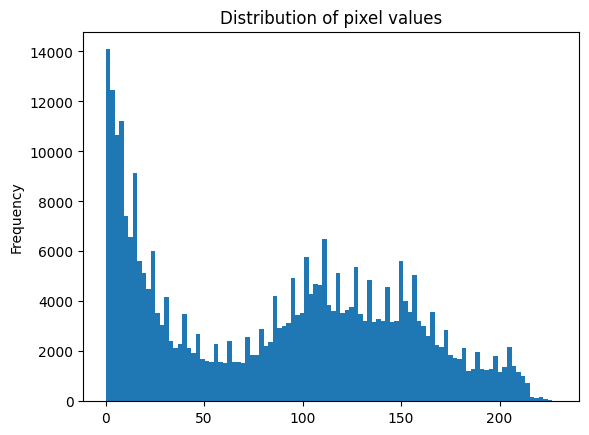

In [5]:
pd.Series(img_plt.flatten()).plot(kind = "hist", bins = 100, title = 'Distribution of pixel values')

### Display Image

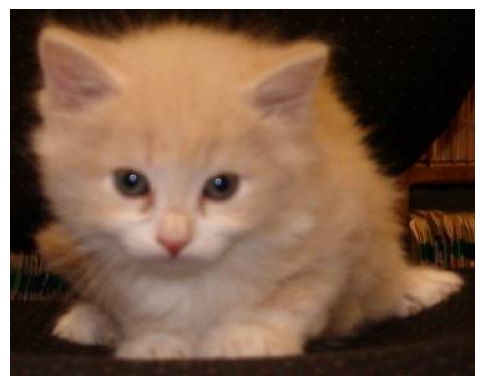

In [6]:
fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(img_plt)
ax.axis("off")
plt.show()

C:\Users\soyvi\AppData\Local\Temp\ipykernel_5260\2984127545.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


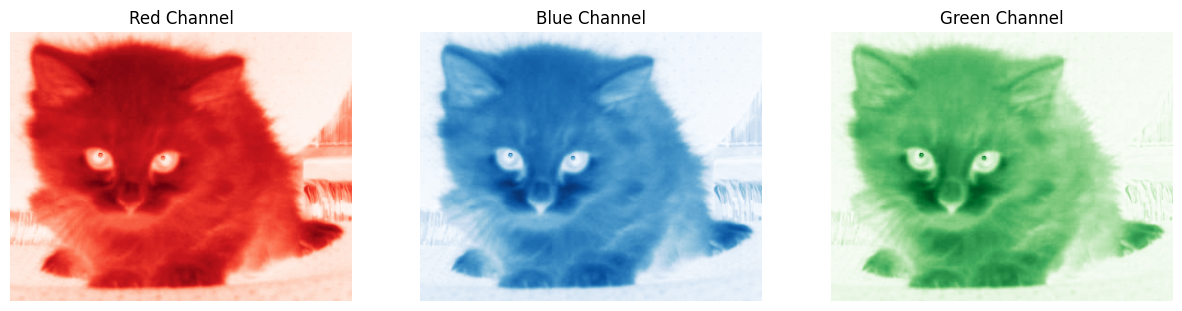

In [7]:
# Display RPG channels of our image
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].imshow(img_plt[:,:,0], cmap="Reds")
axs[1].imshow(img_plt[:,:,1], cmap="Blues")
axs[2].imshow(img_plt[:,:,2], cmap="Greens")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title('Red Channel')
axs[1].set_title('Blue Channel')
axs[2].set_title('Green Channel')
fig.show()

### Matplotlib vs cv2 Numpy Arrays
- cv2 reads in channels as BGR
- matplotlib reads in channels as RGB


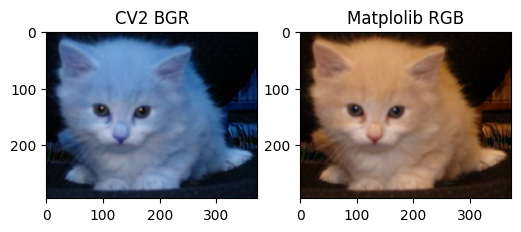

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (6,6))
axs[0].imshow(img_cv2)
axs[1].imshow(img_plt)
axs[0].set_title('CV2 BGR')
axs[1].set_title('Matplolib RGB')
plt.show()

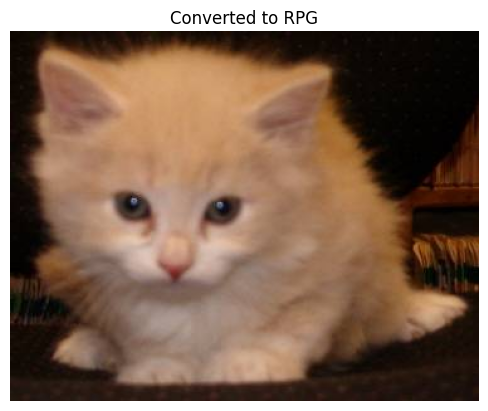

In [9]:
# Converting from BGR to RGB

img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.set_title('Converted to RPG')
ax.axis('off')
plt.show()


### Image Manipolation

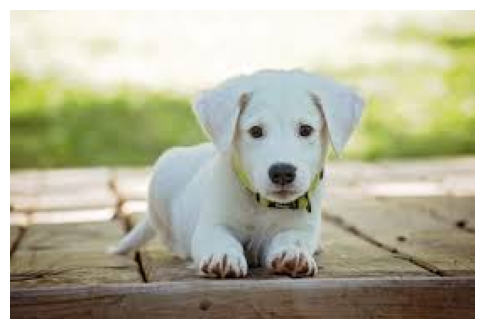

In [10]:
img = plt.imread(dog_files[6])
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img)
ax.axis("off")
plt.show()

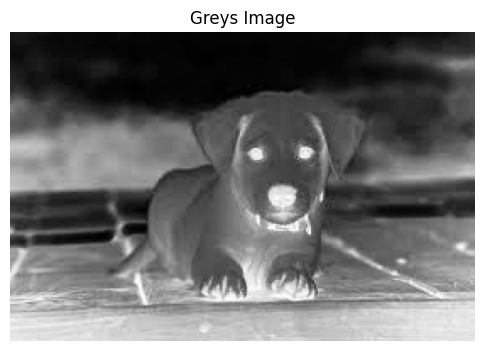

In [11]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img_gray, cmap="Greys")
ax.set_title("Greys Image")
ax.axis("off")
plt.show()

### Resizing and Scaling

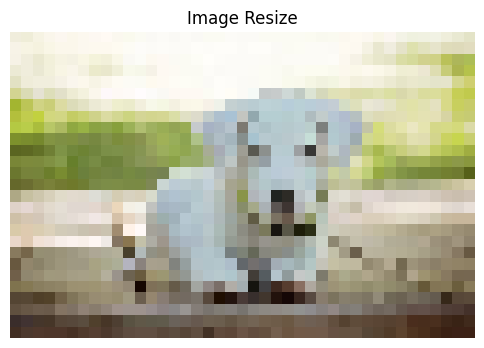

In [12]:
# Down Size
img_resized = cv2.resize(img, None, fx = 0.15, fy = 0.15)

# ploting image
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img_resized)
ax.set_title("Image Resize")
ax.axis("off")
plt.show()

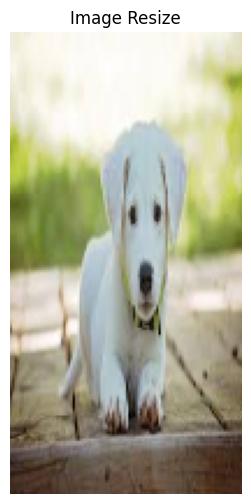

In [13]:
# Different Size

img_downsized = cv2.resize(img, (100,200))
# ploting image
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(img_downsized,)
ax.set_title("Image Resize")
ax.axis("off")
plt.show()

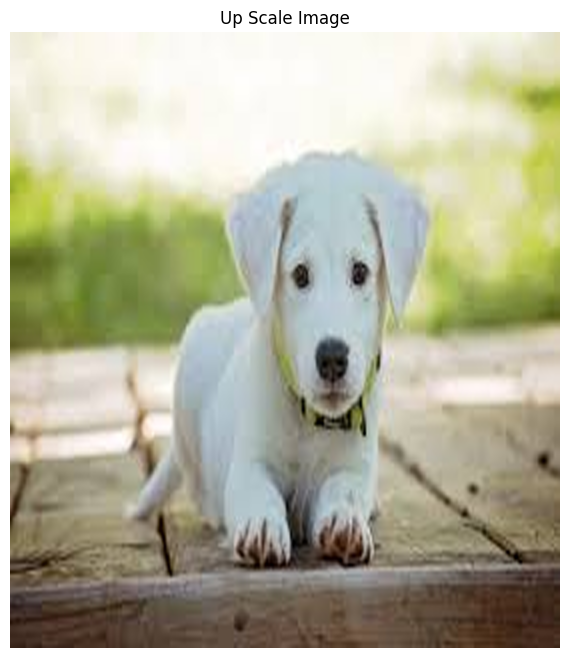

In [14]:
# Up Scale Image
img_resize = cv2.resize(img, (5000, 5600), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.set_title("Up Scale Image")
ax.axis("off")
plt.show()


## CV2 Kernels
<img src = "https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="img Pixel" style = "width:400px;"/>

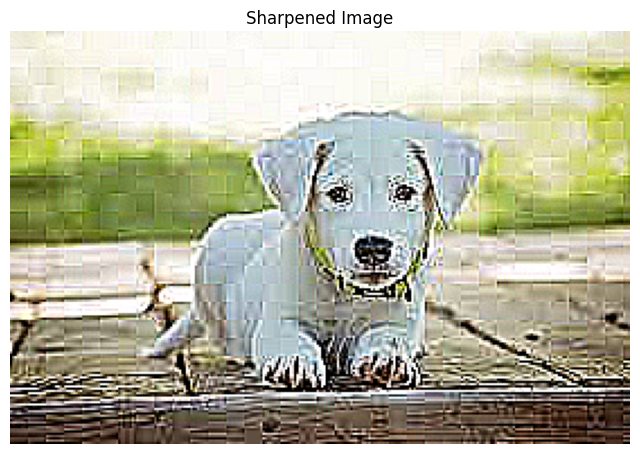

In [15]:
# Sharpening Image
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.set_title("Sharpened Image")
ax.axis("off")
plt.show()

### Saving Image

In [16]:
plt.imsave('./Test_Image/plt_dog.jpg', sharpened)
cv2.imwrite('./Test_Image/cv2_dog.jpg', img_resized)

True